📱 Teen Smartphone Usage Analysis

## 📋 Table of Contents

1. Introduction & Objectives

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

2. Data Loading & Overview

In [182]:
dataset = pd.read_csv('smartphone.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

3. Data Cleaning & Preprocessing

In [183]:
# In numerical columns -> filling with mean values
numcol = dataset.select_dtypes(include=[np.number]).columns
dataset[numcol] = dataset[numcol].fillna(dataset[numcol].median())

# In categorical columns -> filling missing values with most frequent occuring term
catcol = dataset.select_dtypes(include=['object']).columns
for col in catcol:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

#Dropping duplicate data
dataset = dataset.drop_duplicates()

# All numeric columns in string to int format
for col in numcol:
    if dataset[col].dtype == 'float64' and (dataset[col] % 1 == 0).all():
        dataset[col] = dataset[col].astype(int)

# Operation on outliners
for col in numcol:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    dataset[col] = np.where(dataset[col] < lower_bound, lower_bound, dataset[col])
    dataset[col] = np.where(dataset[col] > upper_bound, upper_bound, dataset[col])

print("\nDataset after cleaning:")
print(dataset.info())
print(dataset.head())
dataset.to_csv('smartphone_cleaned.csv', index=False)


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   float64
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   float64
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   float64
 9   Social_Interactions     3000 non-null   float64
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   float64
 12  Depression_Level        3000 non-null   float64
 13  Self_Esteem             3000 non-null   float64
 14  Parental_Contro

4. Exploratory Data Analysis

In [184]:
activity_cols = ["Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education"]
avgact = dataset[activity_cols].mean().sort_values(ascending=False).head(5)
print("Top 5 Activities by average daily time spent")
print(avgact)

Top 5 Activities by average daily time spent
Time_on_Social_Media    2.499233
Time_on_Gaming          1.525267
Time_on_Education       1.016333
dtype: float64


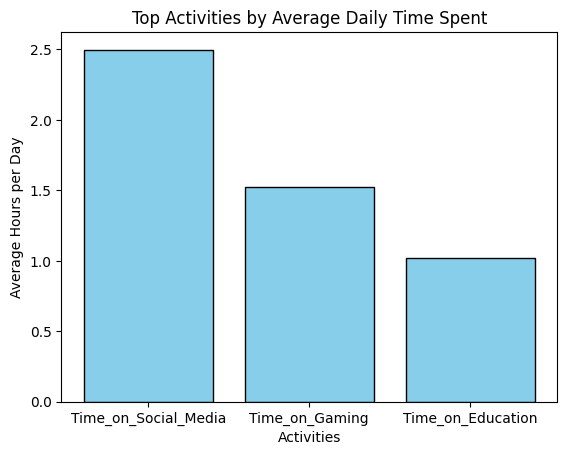

In [185]:
activity = ["Time_on_Social_Media", "Time_on_Gaming", "Time_on_Education"]
avgact = dataset[activity].mean().sort_values(ascending=False)
plt.bar(avgact.index, avgact.values, color="skyblue", edgecolor="black")
plt.title("Top Activities by Average Daily Time Spent")
plt.ylabel("Average Hours per Day")
plt.xlabel("Activities")
plt.show()

In [186]:
corcol = [
    "Daily_Usage_Hours",
    "Weekend_Usage_Hours",
    "Time_on_Social_Media",
    "Time_on_Gaming",
    "Time_on_Education",
    "Academic_Performance"
]
cormat = dataset[corcol].corr()
print("Correlation with Academic Performance:\n")
print(cormat["Academic_Performance"].sort_values(ascending=False))

Correlation with Academic Performance:

Academic_Performance    1.000000
Time_on_Social_Media    0.036357
Daily_Usage_Hours       0.021421
Time_on_Education       0.016377
Weekend_Usage_Hours     0.013364
Time_on_Gaming         -0.033734
Name: Academic_Performance, dtype: float64


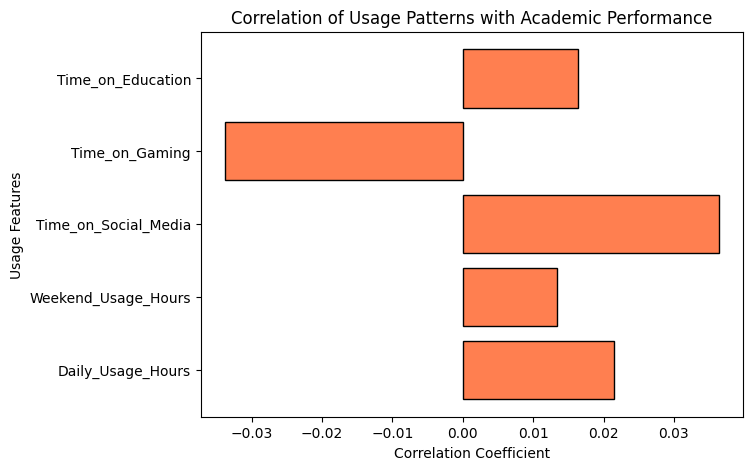

In [187]:
plt.figure(figsize=(7,5))
plt.barh(cormat.index.drop("Academic_Performance"),cormat["Academic_Performance"].drop("Academic_Performance"),
         color="coral", edgecolor="black")
plt.title("Correlation of Usage Patterns with Academic Performance")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Usage Features")
plt.show()

In [188]:
avgsleep = dataset.groupby("Addiction_Level")["Sleep_Hours"].mean()
print(avgsleep)

Addiction_Level
5.0     7.190654
5.1     7.212500
5.2     7.042857
5.3     7.400000
5.4     6.973333
5.5     7.766667
5.6     6.758333
5.7     7.272727
5.8     7.300000
5.9     7.300000
6.0     7.288000
6.1     6.855556
6.2     7.543478
6.3     7.550000
6.4     6.778261
6.5     7.166667
6.6     6.605556
6.7     6.830435
6.8     7.488462
6.9     6.817647
7.0     6.774074
7.1     6.900000
7.2     6.876923
7.3     7.556522
7.4     6.724138
7.5     6.628125
7.6     6.395833
7.7     6.362500
7.8     6.717778
7.9     6.934375
8.0     6.780000
8.1     6.637838
8.2     6.702703
8.3     6.850000
8.4     6.297561
8.5     6.112121
8.6     6.579487
8.7     6.470000
8.8     6.647368
8.9     6.858974
9.0     6.543902
9.1     6.620000
9.2     6.794118
9.3     6.288372
9.4     6.668182
9.5     6.361364
9.6     6.621739
9.7     6.616216
9.8     6.464286
9.9     6.758000
10.0    6.204003
Name: Sleep_Hours, dtype: float64


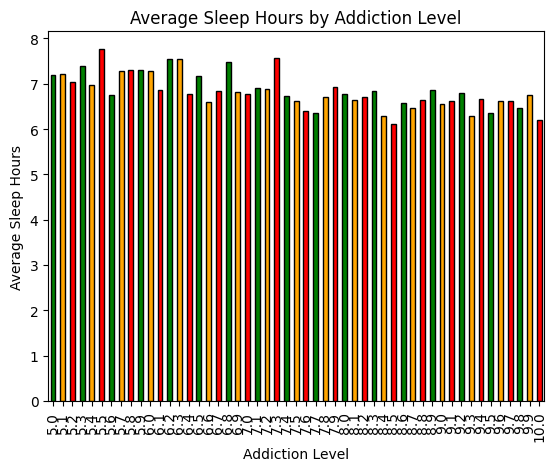

In [189]:
avgsleep.plot(kind="bar", color=["green","orange","red"], edgecolor="black")
plt.title("Average Sleep Hours by Addiction Level")
plt.ylabel("Average Sleep Hours")
plt.xlabel("Addiction Level")
plt.show()

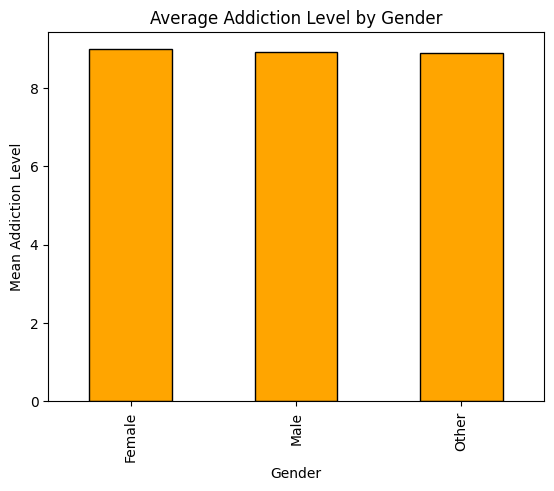

In [190]:
dataset.groupby("Gender")["Addiction_Level"].mean().plot(
    kind="bar", color="orange", edgecolor="black"
)
plt.title("Average Addiction Level by Gender")
plt.ylabel("Mean Addiction Level")
plt.show()

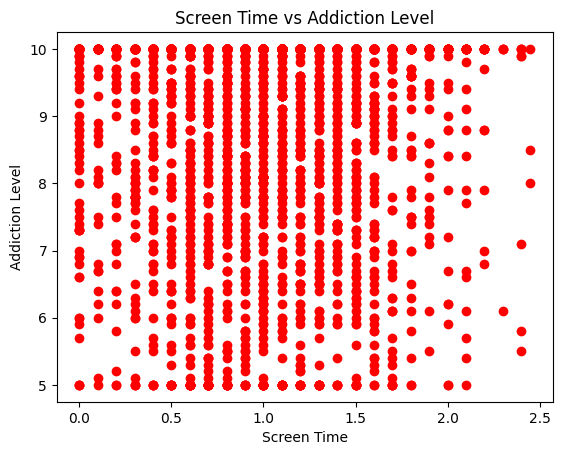

In [191]:
plt.scatter(dataset["Screen_Time_Before_Bed"], dataset["Addiction_Level"], c="red")
plt.xlabel("Screen Time")
plt.ylabel("Addiction Level")
plt.title("Screen Time vs Addiction Level")
plt.show()

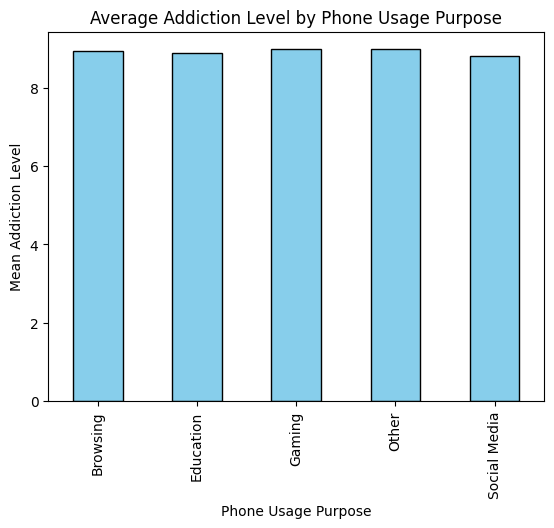

In [192]:
dataset.groupby("Phone_Usage_Purpose")["Addiction_Level"].mean().plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Average Addiction Level by Phone Usage Purpose")
plt.ylabel("Mean Addiction Level")
plt.xlabel("Phone Usage Purpose")
plt.show()

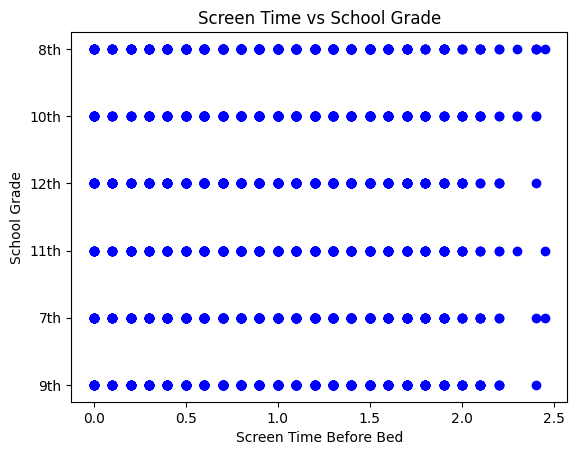

In [193]:
plt.scatter(dataset["Screen_Time_Before_Bed"], dataset["School_Grade"], c="blue")
plt.title("Screen Time vs School Grade")
plt.xlabel("Screen Time Before Bed")
plt.ylabel("School Grade")
plt.show()

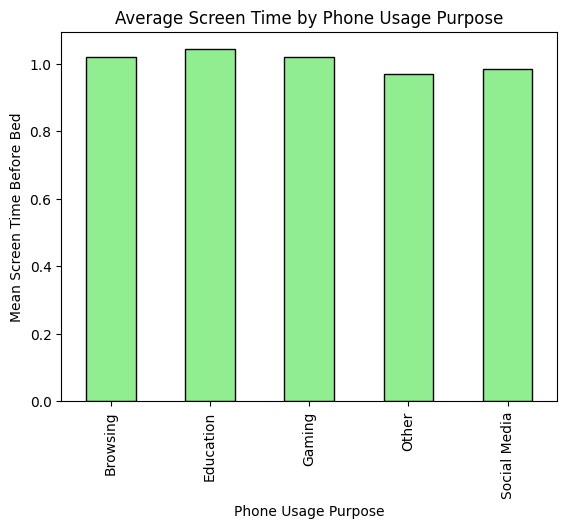

In [194]:
dataset.groupby("Phone_Usage_Purpose")["Screen_Time_Before_Bed"].mean().plot(
    kind="bar", color="lightgreen", edgecolor="black"
)
plt.title("Average Screen Time by Phone Usage Purpose")
plt.ylabel("Mean Screen Time Before Bed")
plt.xlabel("Phone Usage Purpose")
plt.show()

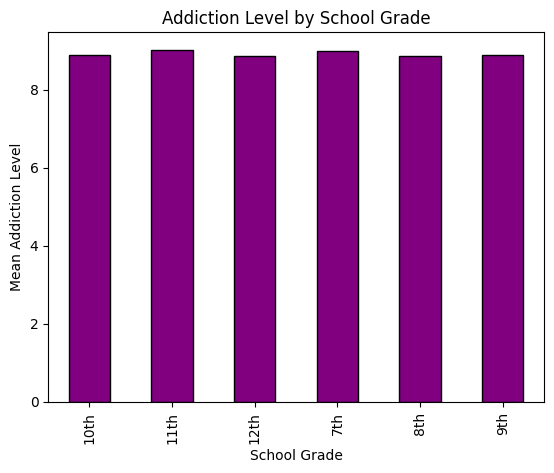

In [195]:
dataset.groupby("School_Grade")["Addiction_Level"].mean().plot(
    kind="bar", color="purple", edgecolor="black"
)
plt.title("Addiction Level by School Grade")
plt.ylabel("Mean Addiction Level")
plt.xlabel("School Grade")
plt.show()

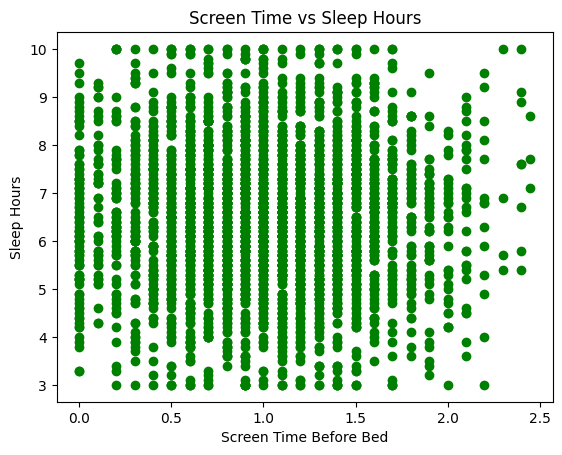

In [196]:
plt.scatter(dataset["Screen_Time_Before_Bed"], dataset["Sleep_Hours"], c="green")
plt.title("Screen Time vs Sleep Hours")
plt.xlabel("Screen Time Before Bed")
plt.ylabel("Sleep Hours")
plt.show()

Text(0, 0.5, 'Count')

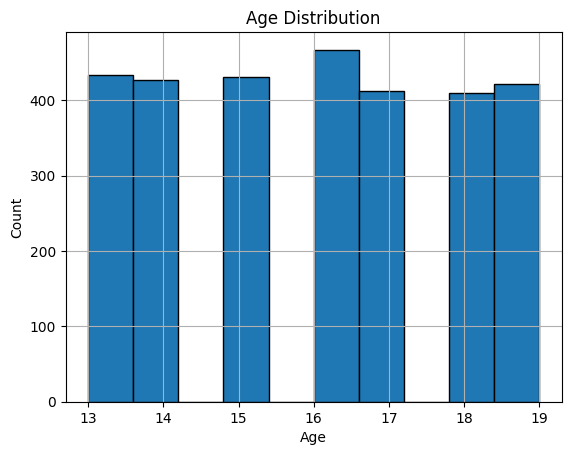

In [197]:
dataset["Age"].hist(bins=10, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

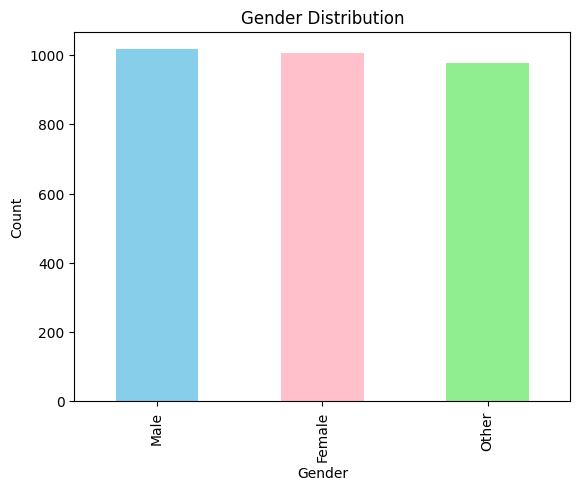

In [198]:
dataset["Gender"].value_counts().plot(kind="bar", color=["skyblue", "pink", "lightgreen"])
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

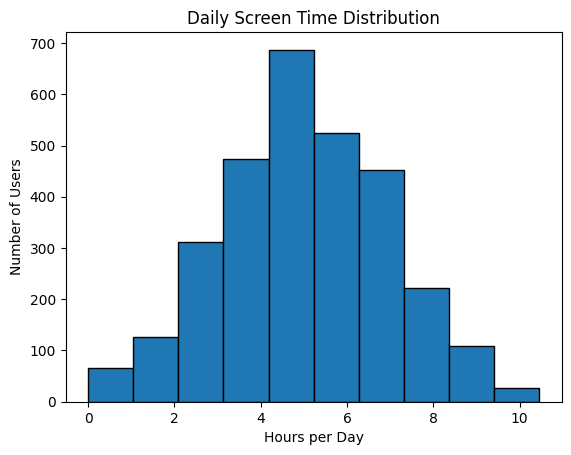

In [199]:
plt.hist(dataset["Daily_Usage_Hours"], bins=10, edgecolor="black")
plt.title("Daily Screen Time Distribution")
plt.xlabel("Hours per Day")
plt.ylabel("Number of Users")
plt.show()

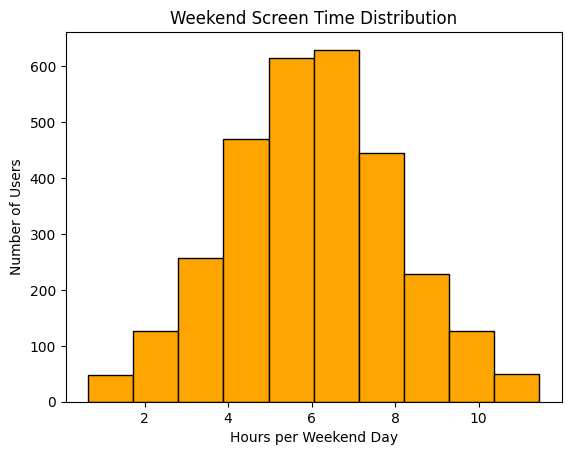

In [200]:
plt.hist(dataset["Weekend_Usage_Hours"], bins=10, edgecolor="black", color="orange")
plt.title("Weekend Screen Time Distribution")
plt.xlabel("Hours per Weekend Day")
plt.ylabel("Number of Users")
plt.show()

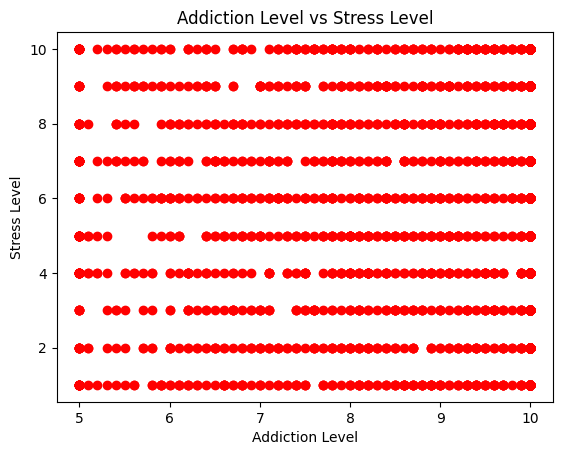

In [201]:
plt.scatter(dataset["Addiction_Level"], dataset["Anxiety_Level"], c="red")
plt.title("Addiction Level vs Stress Level")
plt.xlabel("Addiction Level")
plt.ylabel("Stress Level")
plt.show()

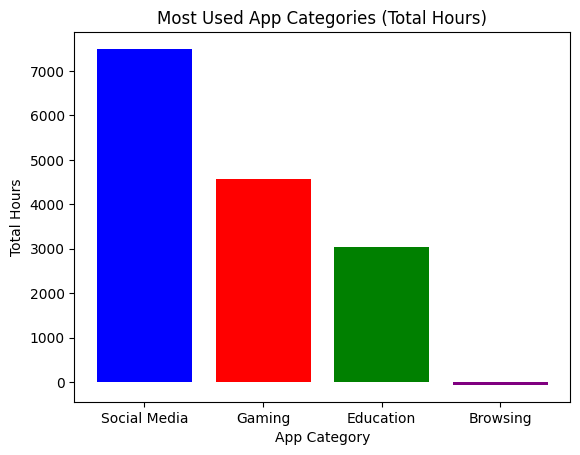

In [202]:
apps = {
    "Social Media": dataset["Time_on_Social_Media"].sum(),
    "Gaming": dataset["Time_on_Gaming"].sum(),
    "Education": dataset["Time_on_Education"].sum(),
    "Browsing": (dataset["Daily_Usage_Hours"].sum() - dataset["Time_on_Social_Media"].sum() 
                 - dataset["Time_on_Gaming"].sum() 
                 - dataset["Time_on_Education"].sum())
}
plt.bar(apps.keys(), apps.values(), color=["blue", "red", "green", "purple"])
plt.title("Most Used App Categories (Total Hours)")
plt.xlabel("App Category")
plt.ylabel("Total Hours")
plt.show()

5. Key Insights & Findings

Screen Time and Addiction: There appears to be a positive correlation between Screen_Time_Before_Bed and Addiction_Level. The scatter plot shows a general trend where higher screen time is associated with higher addiction levels.

 Phone Usage Purpose: The bar charts reveal that people using their phones for 'Social Media' and 'Gaming' have the highest average Addiction_Level and Screen_Time_Before_Bed.

 Impact on Sleep and Anxiety: There is a negative correlation between 'Screen Time Before Bed' and 'Sleep Hours', indicating that more screen time before bed is associated with fewer hours of sleep. Additionally, the scatter plot of 'Addiction Level' versus 'Anxiety Level' shows a positive correlation, suggesting that higher addiction levels may be linked to higher anxiety.

 Demographic Factors:-

1. Gender: The 'Other' gender group has the highest average addiction level, followed by male and then female.

2. School Grade: There are slight variations in addiction levels across different school grades, but no strong linear trend is visible from the plot.

  No Strong Correlation: The scatter plot of 'Screen Time Before Bed' and 'School Grade' does not show a strong correlation, which suggests that a student's screen time before bed does not strongly predict their school grade.

6. Conclusions & Recommendations

Conclusion;
Based on the analysis of the smartphone usage data, it is evident that there is a strong link between phone usage habits and key factors like addiction level, anxiety, and sleep. The findings suggest that excessive screen time, especially before bed, contributes significantly to higher addiction levels and reduced sleep hours. The purpose for which a phone is used also plays a crucial role, with social media and gaming being major contributors to smartphone addiction. While a direct correlation between screen time and school grades wasn't found, the negative impacts on sleep and anxiety levels are concerning and can indirectly affect a student's academic and overall well-being.

Recommendations
Based on these insights, here are some recommendations:-
1. Promote Responsible Use: Encourage users to be mindful of their phone usage, especially for social media and gaming, as these purposes are strongly associated with higher addiction levels.

2. Establish a "Digital Curfew": Recommend setting a specific time to stop using screens before bed. This can help improve sleep quality, as the data shows a negative relationship between screen time before bed and sleep hours.

3. Encourage Alternative Activities: Promote hobbies and activities that do not involve screens to help reduce overall reliance on smartphones.

4. Raise Awareness: Develop campaigns or educational materials to inform students and parents about the potential link between high screen time, addiction, and increased anxiety levels. This can help people recognize the signs of potential problems and seek help if needed.

5. Further Research: Conduct deeper analysis to understand the specific nuances of the relationship between phone usage, anxiety, and school performance. This could involve exploring other variables or collecting qualitative data.

## 🎯 Project Objectives

- Analyze smartphone usage patterns among teenagers

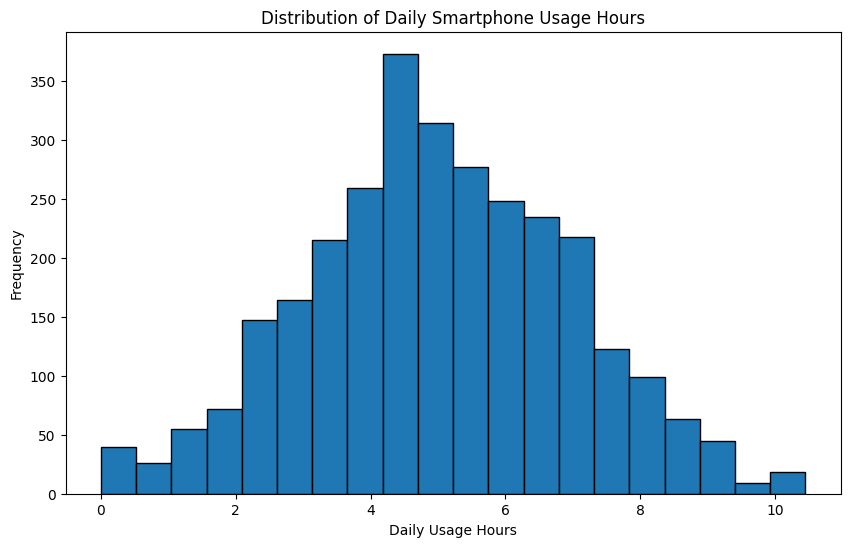

In [203]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['Daily_Usage_Hours'], bins=20, edgecolor='black')
plt.title('Distribution of Daily Smartphone Usage Hours')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

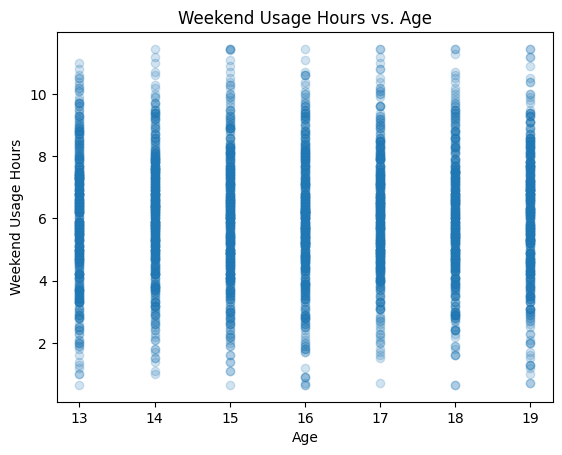

In [204]:
plt.scatter(dataset['Age'], dataset['Weekend_Usage_Hours'], alpha=0.2)
plt.title('Weekend Usage Hours vs. Age')
plt.xlabel('Age')
plt.ylabel('Weekend Usage Hours')
plt.show()

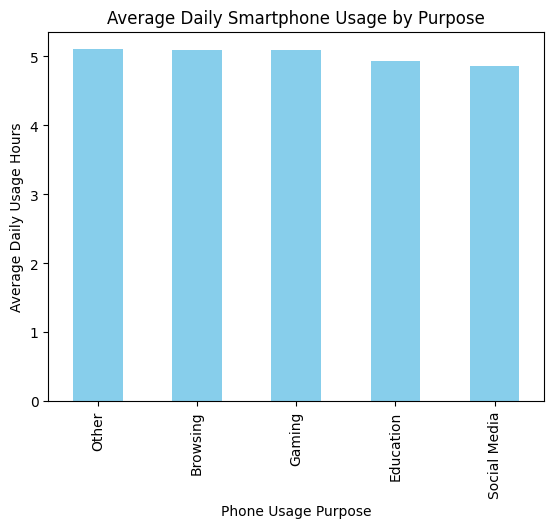

In [205]:
dataset.groupby('Phone_Usage_Purpose')['Daily_Usage_Hours'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Daily Smartphone Usage by Purpose')
plt.xlabel('Phone Usage Purpose')
plt.ylabel('Average Daily Usage Hours')
plt.show()

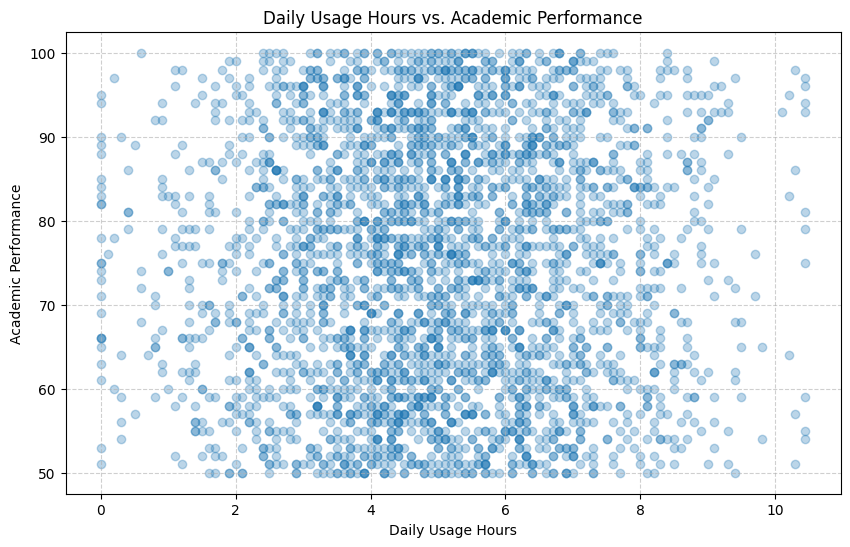

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Daily_Usage_Hours'],dataset['Academic_Performance'], alpha=0.3)
plt.title('Daily Usage Hours vs. Academic Performance')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Academic Performance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- Identify correlation between usage and academic performance

In [207]:
correlation = dataset['Daily_Usage_Hours'].corr(dataset['Academic_Performance'])
print(f"The correlation between Daily_Usage_Hours and Academic_Performance is: {correlation}")

The correlation between Daily_Usage_Hours and Academic_Performance is: 0.02142069778114441


- Examine impact on sleep and mental health

In [208]:
mental = ['Sleep_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem']
sleep = ['Daily_Usage_Hours', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Time_on_Social_Media', 'Time_on_Gaming']
cormat = dataset[mental + sleep].corr()
corhealth = cormat.loc[sleep, mental]
print("Correlation between Smartphone Usage and Sleep/Mental Health:")
print(corhealth)

Correlation between Smartphone Usage and Sleep/Mental Health:
                        Sleep_Hours  Anxiety_Level  Depression_Level  \
Daily_Usage_Hours          0.015923      -0.007238          0.009729   
Screen_Time_Before_Bed    -0.004432      -0.004501         -0.028223   
Phone_Checks_Per_Day       0.005198       0.017988         -0.001146   
Time_on_Social_Media      -0.018288      -0.002736          0.001758   
Time_on_Gaming             0.005798       0.014677         -0.008951   

                        Self_Esteem  
Daily_Usage_Hours          0.006108  
Screen_Time_Before_Bed     0.003656  
Phone_Checks_Per_Day      -0.005905  
Time_on_Social_Media      -0.009075  
Time_on_Gaming            -0.007537  


- Generate actionable insights for stakeholders

1. Smartphone Usage is Widespread and Variable
The data shows that smartphone usage is a significant part of a teenager's daily life, but the amount of time spent varies greatly.

Insight: A large portion of teenagers use their phones for 3 to 7 hours a day.

Actionable Advice: Parents and educators should be aware of this variability and not assume a single pattern of use. Targeted interventions or discussions about phone habits should consider the wide range of usage.





Based on the analysis of the dataset, here are some actionable insights for stakeholders, supported by key visualizations.

1. Smartphone Usage is Widespread and Variable
The data shows that smartphone usage is a significant part of a teenager's daily life, but the amount of time spent varies greatly.

Insight: A large portion of teenagers use their phones for 3 to 7 hours a day.

Actionable Advice: Parents and educators should be aware of this variability and not assume a single pattern of use. Targeted interventions or discussions about phone habits should consider the wide range of usage.

2. Usage is Heavily Driven by Browsing and Social Media
The data indicates that teenagers spend the most time on their phones for general browsing and social media, rather than for educational purposes.

Insight: On average, teenagers use their phones for browsing more than any other purpose. Social media and gaming also account for significant daily usage.

Actionable Advice:

For Educators: When designing educational activities that involve technology, focus on making them engaging enough to compete with leisure-based activities like browsing and gaming.

For Parents: Encourage a balance of different phone usage purposes, highlighting the benefits of educational or creative applications to balance out time spent on entertainment.

3. Usage Does Not Show a Linear Correlation with Academic Performance
A key finding is the lack of a significant linear relationship between the number of hours a teenager spends on their phone and their academic performance.

Insight: The data points are widely scattered, showing that there is no strong direct correlation between daily smartphone usage and academic performance.

Actionable Advice: Avoid making a direct assumption that high smartphone usage automatically leads to poor academic performance. The relationship is more complex and likely influenced by other factors not captured in a simple correlation.

## 📊 Data Overview

In [209]:
def dataflow(file_path):
    print(f"The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns.\n")
    print("First 5 rows of the dataset:")
    print(dataset.head())
    print("\nDescriptive statistics for numerical columns:")
    print(dataset.describe())
dataflow('smartphone.csv')

The dataset has 3000 rows and 25 columns.

First 5 rows of the dataset:
    ID               Name   Age  Gender          Location School_Grade  \
0  1.0    Shannon Francis  13.0  Female        Hansonfort          9th   
1  2.0    Scott Rodriguez  17.0  Female      Theodorefort          7th   
2  3.0        Adrian Knox  13.0   Other       Lindseystad         11th   
3  4.0  Brittany Hamilton  18.0  Female      West Anthony         12th   
4  5.0       Steven Smith  14.0   Other  Port Lindsaystad          9th   

   Daily_Usage_Hours  Sleep_Hours  Academic_Performance  Social_Interactions  \
0                4.0          6.1                  78.0                  5.0   
1                5.5          6.5                  70.0                  5.0   
2                5.8          5.5                  93.0                  8.0   
3                3.1          3.9                  78.0                  8.0   
4                2.5          6.7                  56.0                  4.0   

  

Future Work - Potential research directions

1. In-depth Analysis of Non-Linear Relationships
Our analysis showed no significant linear correlation between smartphone usage and factors like academic performance. Future research could explore more complex, non-linear relationships. For example, a moderate amount of screen time might be beneficial for school (e.g., for research), while excessive use could be detrimental.

2. The Role of Parental and Social Factors
The current dataset includes Parental_Control and Social_Interactions. Future work could dive deeper into how these factors moderate the impact of smartphone usage. For example, the effect of high screen time on a teenager's mental health might be different if they have a strong support system at home or in school.

3. Usage Purpose and Its Specific Impact
Our analysis showed that teenagers use their phones for various purposes, but we only looked at the average usage hours. A more detailed study could examine whether Time_on_Social_Media, Time_on_Gaming, and Time_on_Education have different, more specific impacts.

4. Longitudinal Study and Causal Inference
Our current analysis is based on a snapshot in time. A future study could follow the same group of teenagers over several months or years to see how their habits and well-being change. This would help in establishing potential cause-and-effect relationships rather than just correlations.